In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('P2- OfficeSupplies Data.csv')

In [3]:
df

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95
5,15-Aug-14,East,Richard,Pencil,35,4.99
6,24-Aug-14,West,James,Desk,3,275.00
7,01-Sep-14,Central,Smith,Desk,2,125.00
8,10-Sep-14,Central,Bill,Pencil,7,1.29
9,18-Sep-14,East,Richard,Pen Set,16,15.99


### Sales Analysis

In [4]:
df['Item'].value_counts()

Item
Binder     15
Pencil     13
Pen Set     7
Pen         5
Desk        3
Name: count, dtype: int64

In [5]:
total_sales=df.groupby('Item')['Units'].sum()

In [7]:
total_sales.sort_values(ascending=False)

Item
Binder     722
Pencil     716
Pen Set    395
Pen        278
Desk        10
Name: Units, dtype: int64

In [9]:
customers = df.groupby('Rep')['Units'].sum().sort_values(ascending=False)
top_10_customers=customers.head(10)
print(top_10_customers)

Rep
Richard    396
Alex       281
Bill       213
Matthew    193
Rachel     183
Morgan     173
Susan      170
Smith      156
James      142
Nick       125
Name: Units, dtype: int64


In [12]:
unique_customers = df['Rep'].unique()

In [13]:
unique_customers

array(['Richard', 'Nick', 'Morgan', 'Susan', 'Matthew', 'James', 'Smith',
       'Bill', 'Thomas', 'Rachel', 'Alex'], dtype=object)

In [14]:
print("No of unique customers: ",len(unique_customers))

No of unique customers:  11


In [15]:
purchase_freq=df['Rep'].value_counts()

In [16]:
purchase_freq

Rep
Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: count, dtype: int64

### Time Series Analysis

In [10]:
df.dtypes

OrderDate      object
Region         object
Rep            object
Item           object
Units           int64
Unit Price    float64
dtype: object

In [11]:
df['OrderDate']=pd.to_datetime(df['OrderDate'])

C:\Users\prati\AppData\Local\Temp\ipykernel_8020\1764309818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['OrderDate']=pd.to_datetime(df['OrderDate'])


In [12]:
df.dtypes

OrderDate     datetime64[ns]
Region                object
Rep                   object
Item                  object
Units                  int64
Unit Price           float64
dtype: object

In [13]:
df['Month'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Units'].sum()


In [14]:
monthly_sales

Month
2014-07    227
2014-08     80
2014-09    101
2014-10    163
2014-11    122
2014-12    263
2015-01    191
2015-02    154
2015-03    113
2015-04    297
2015-05    255
2015-06    155
Freq: M, Name: Units, dtype: int64

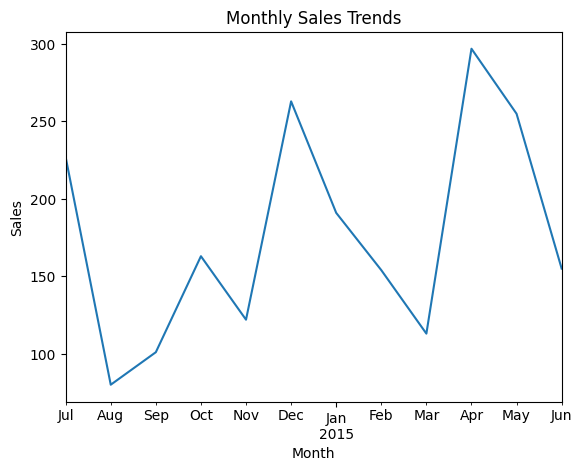

In [24]:
import matplotlib.pyplot as plt
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [29]:
monthly_sales_seasonal = monthly_sales.groupby(monthly_sales.index.month).mean()

In [30]:
monthly_sales_seasonal

Month
1     191.0
2     154.0
3     113.0
4     297.0
5     255.0
6     155.0
7     227.0
8      80.0
9     101.0
10    163.0
11    122.0
12    263.0
Name: Units, dtype: float64

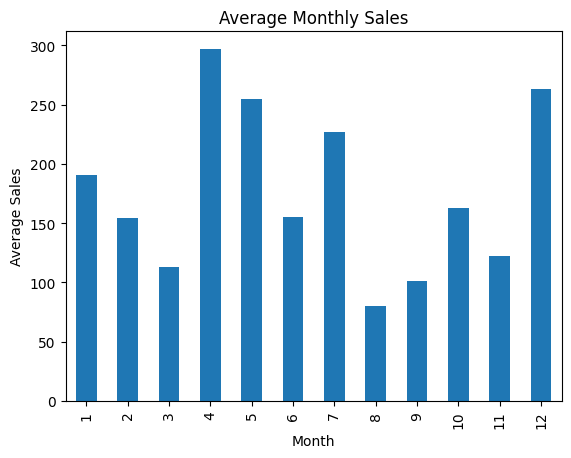

In [37]:
monthly_sales_seasonal.plot(kind='bar')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

### Geographical Analysis

In [15]:
df

,OrderDate,Region,Rep,Item,Units,Unit Price,Month
0,2014-07-04,East,Richard,Pen Set,62,4.99,2014-07
1,2014-07-12,East,Nick,Binder,29,1.99,2014-07
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,2014-07
3,2014-07-29,East,Susan,Binder,81,19.99,2014-07
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,2014-08
5,2014-08-15,East,Richard,Pencil,35,4.99,2014-08
6,2014-08-24,West,James,Desk,3,275.00,2014-08
7,2014-09-01,Central,Smith,Desk,2,125.00,2014-09
8,2014-09-10,Central,Bill,Pencil,7,1.29,2014-09
9,2014-09-18,East,Richard,Pen Set,16,15.99,2014-09


In [16]:
df['Region'].value_counts()

Region
Central    24
East       13
West        6
Name: count, dtype: int64

In [18]:
region_sales=df.groupby('Region')['Units'].sum()

In [19]:
region_sales

Region
Central    1199
East        691
West        231
Name: Units, dtype: int64

### Profit Analysis

In [22]:
df['Profit']=df['Units']*df['Unit Price']

In [23]:
df

,OrderDate,Region,Rep,Item,Units,Unit Price,Month,Profit
0,2014-07-04,East,Richard,Pen Set,62,4.99,2014-07,309.38
1,2014-07-12,East,Nick,Binder,29,1.99,2014-07,57.71
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,2014-07,686.95
3,2014-07-29,East,Susan,Binder,81,19.99,2014-07,1619.19
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,2014-08,1005.90
5,2014-08-15,East,Richard,Pencil,35,4.99,2014-08,174.65
6,2014-08-24,West,James,Desk,3,275.00,2014-08,825.00
7,2014-09-01,Central,Smith,Desk,2,125.00,2014-09,250.00
8,2014-09-10,Central,Bill,Pencil,7,1.29,2014-09,9.03
9,2014-09-18,East,Richard,Pen Set,16,15.99,2014-09,255.84


In [24]:
total_profit=df.groupby('Item')['Profit'].sum()

In [26]:
total_profit.sort_values(ascending=False)

Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Profit, dtype: float64